<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/4_Valores_at%C3%ADpicos_DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [3]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Ventas_totales.csv') 

In [4]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   indice_tiempo                        65 non-null     object 
 1   ventas_precios_corrientes            65 non-null     float64
 2   ventas_precios_constantes            65 non-null     float64
 3   ventas_totales_canal_venta           65 non-null     float64
 4   salon_ventas                         59 non-null     float64
 5   canales_on_line                      65 non-null     float64
 6   ventas_totales_medio_pago            65 non-null     float64
 7   efectivo                             65 non-null     float64
 8   tarjetas_debito                      64 non-null     float64
 9   tarjetas_credito                     58 non-null     float64
 10  otros_medios                         64 non-null     float64
 11  ventas_totales_grupo_articulos    

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

**PROCEDIMIENTO PARA ELIMINAR VALORES NULOS EN DATAFRAME**

In [ ]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1 =data.fillna(method="bfill") 
data1

In [ ]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

In [9]:
#Creo 2 dataframe para poder procesar los outliers
cuantitativas= data1.iloc[ : , 1:23 ]
cualitativas= data1.iloc[ : , [0] ]

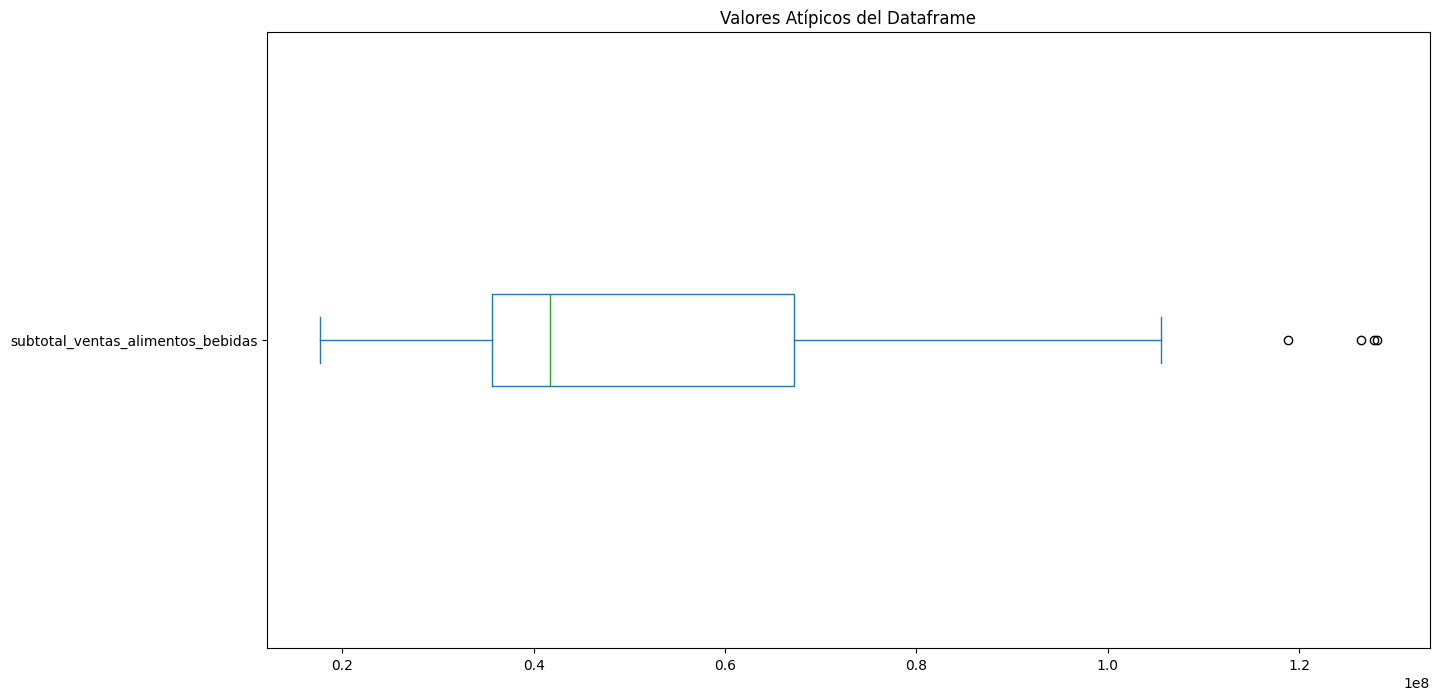

In [11]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas['subtotal_ventas_alimentos_bebidas'].plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [12]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido ventas_precios_corrientes              1.923194e+05
ventas_precios_constantes              3.193875e+04
ventas_totales_canal_venta             1.875116e+08
salon_ventas                           1.780323e+08
canales_on_line                        9.196781e+06
ventas_totales_medio_pago              1.875116e+08
efectivo                               5.942022e+07
tarjetas_debito                        5.193351e+07
tarjetas_credito                       6.619178e+07
otros_medios                           1.065047e+07
ventas_totales_grupo_articulos         1.875116e+08
subtotal_ventas_alimentos_bebidas      1.145480e+08
bebidas                                2.282518e+07
almacen                                5.075533e+07
panaderia                              5.344003e+06
lacteos                                1.994066e+07
carnes                                 2.390920e+07
verduleria_fruteria                    7.969238e+06
alimentos_preparados_rotiseria        

In [ ]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

In [ ]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

In [19]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("Datos_limpios.csv")

In [29]:
#descargar archivo filtrado en csv
from google.colab import files 
  
  
files.download("Datos_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>